# Regression Models: Linear - Ridge - Lasso

## Load Dataset

In [105]:
#!gdown 1Dh_y7gFDUa2sD72_cKIa209dhbMVoGEd

In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#ignoring the warnings while executing codes
import warnings
warnings.filterwarnings("ignore")

In [107]:
#importing Dataset
house_df = pd.read_csv("train-house-prices-advanced-regression-techniques.csv")

#checking dataset
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [108]:
house_df.shape

(1460, 81)

## EDA

In [109]:
#describe the data with some visual style by applying T = Transpose and style
house_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [110]:
house_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Text(0.5, 1.0, 'Sales')

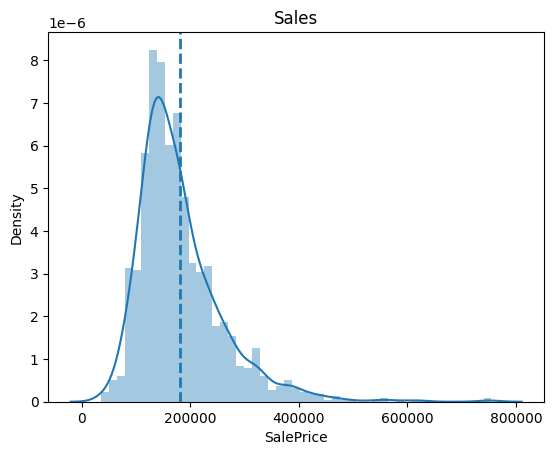

In [111]:
# target variable
sns.distplot(house_df["SalePrice"])
plt.axvline(x=house_df["SalePrice"].mean(), linestyle="--", linewidth=2)
plt.title("Sales")

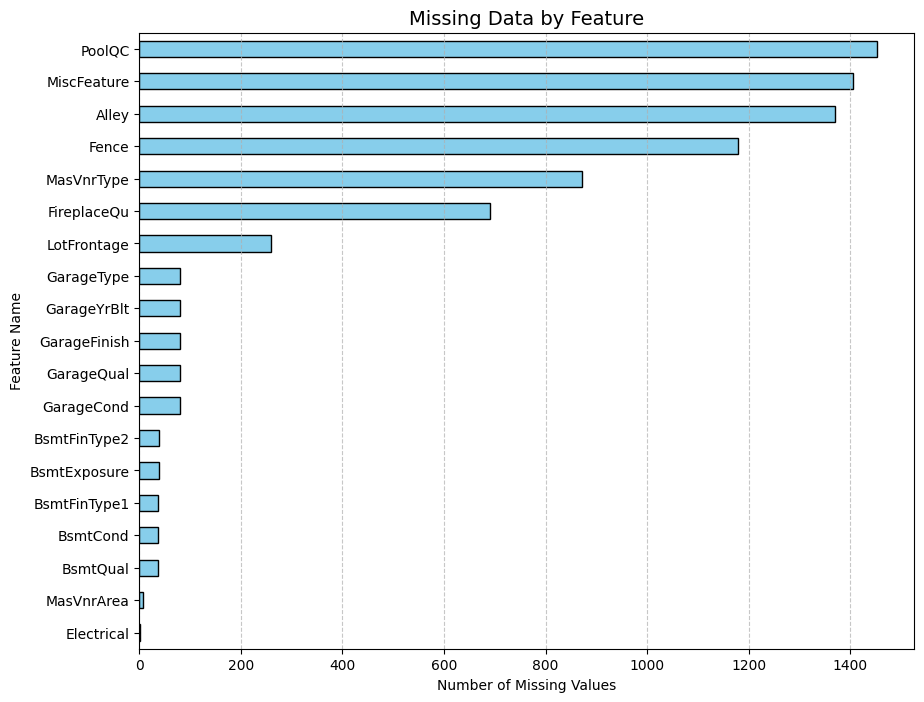

In [112]:
# Checking missing values (horizontal view)
missing = house_df.isnull().sum()
missing = missing[missing > 0]
missing = missing.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
missing.plot.barh(color='skyblue', edgecolor='black')
plt.title("Missing Data by Feature", fontsize=14)
plt.xlabel("Number of Missing Values")
plt.ylabel("Feature Name")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()
plt.show()


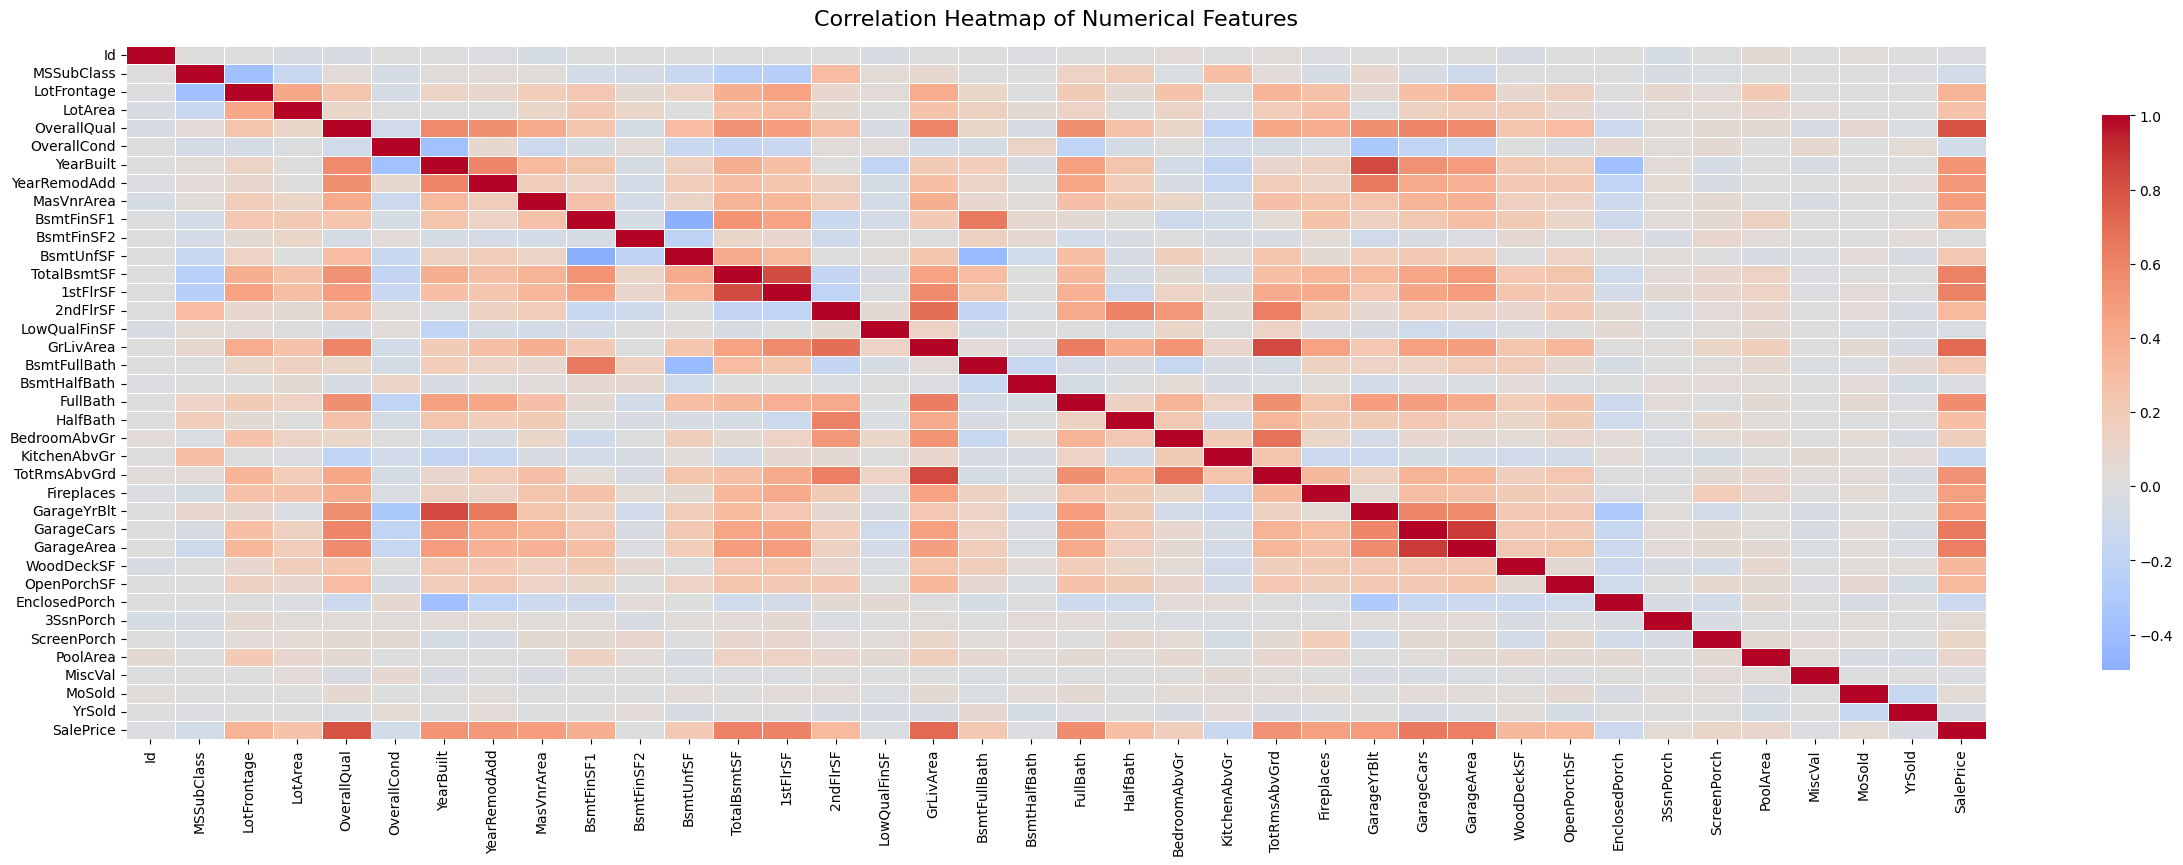

In [113]:
plt.figure(figsize=(30, 9))
sns.heatmap(
    house_df.corr(numeric_only=True),
    cmap="coolwarm",
    linewidths=0.5,
    center=0,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap of Numerical Features", fontsize=16, pad=15)
plt.show()


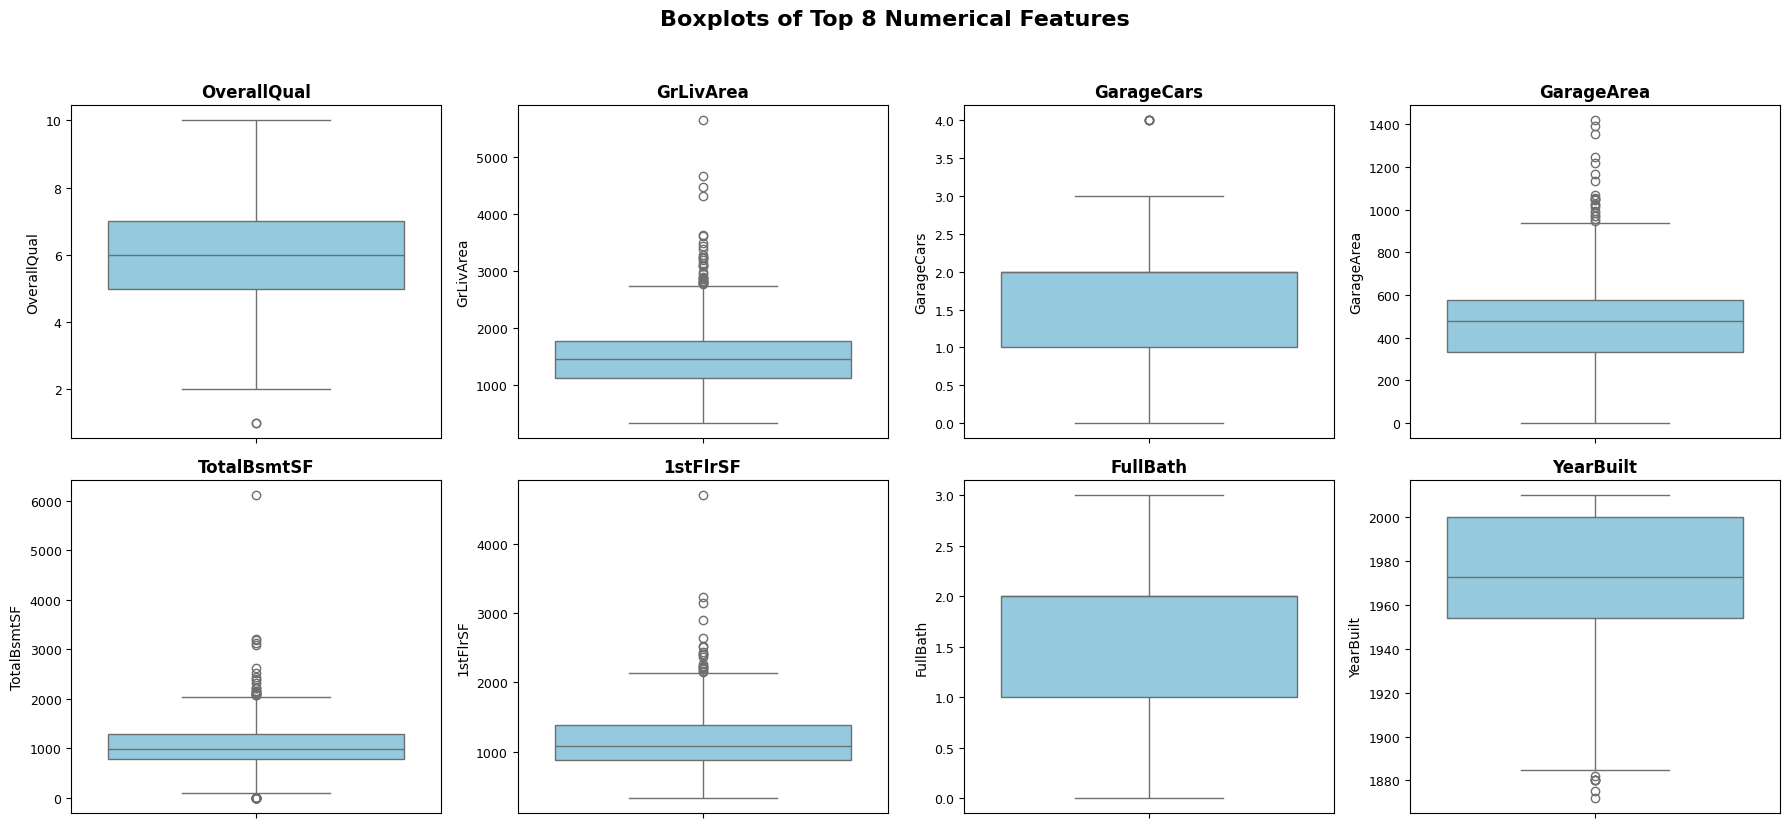

In [114]:
# Chọn 8 đặc trưng numeric quan trọng nhất dựa trên tương quan với SalePrice
important_cols = [
    "OverallQual", "GrLivArea", "GarageCars", "GarageArea",
    "TotalBsmtSF", "1stFlrSF", "FullBath", "YearBuilt"
]

fig, axes = plt.subplots(2, 4, figsize=(18, 8))
axes = axes.flatten()

for i, col in enumerate(important_cols):
    sns.boxplot(data=house_df, y=col, ax=axes[i], color="skyblue")
    axes[i].set_title(col, fontsize=12, fontweight="bold")
    axes[i].tick_params(labelsize=9)

for i in range(len(important_cols), len(axes)):
    axes[i].set_visible(False)

plt.suptitle("Boxplots of Top 8 Numerical Features", fontsize=16, fontweight="bold", y=1.03)
plt.tight_layout()
plt.show()

## Advanced Data Preprocessing

### Bước 1: Xử lý giá trị thiếu chi tiết


In [115]:
# Tạo bản sao để xử lý mà không ảnh hưởng đến dữ liệu gốc
house_df_processed = house_df.copy()

print("=== XỬ LÝ GIÁ TRỊ THIẾU CHI TIẾT ===")
print(f"Kích thước dữ liệu: {house_df_processed.shape}")

# Kiểm tra giá trị thiếu trước khi xử lý
missing_before = house_df_processed.isnull().sum()
missing_cols = missing_before[missing_before > 0]
print(f"\nSố cột có giá trị thiếu: {len(missing_cols)}")
print("Các cột có giá trị thiếu:")
for col, count in missing_cols.items():
    print(f"  {col}: {count} ({count/len(house_df_processed)*100:.1f}%)")


=== XỬ LÝ GIÁ TRỊ THIẾU CHI TIẾT ===
Kích thước dữ liệu: (1460, 81)

Số cột có giá trị thiếu: 19
Các cột có giá trị thiếu:
  LotFrontage: 259 (17.7%)
  Alley: 1369 (93.8%)
  MasVnrType: 872 (59.7%)
  MasVnrArea: 8 (0.5%)
  BsmtQual: 37 (2.5%)
  BsmtCond: 37 (2.5%)
  BsmtExposure: 38 (2.6%)
  BsmtFinType1: 37 (2.5%)
  BsmtFinType2: 38 (2.6%)
  Electrical: 1 (0.1%)
  FireplaceQu: 690 (47.3%)
  GarageType: 81 (5.5%)
  GarageYrBlt: 81 (5.5%)
  GarageFinish: 81 (5.5%)
  GarageQual: 81 (5.5%)
  GarageCond: 81 (5.5%)
  PoolQC: 1453 (99.5%)
  Fence: 1179 (80.8%)
  MiscFeature: 1406 (96.3%)


In [116]:
# Định nghĩa các cột categorical liên quan đến phòng ốc/khu vực
# Những cột này có giá trị null có nghĩa là "không có" khu vực/phòng đó
categorical_none_cols = [
    'PoolQC',      # Chất lượng hồ bơi - null = không có hồ bơi
    'Alley',       # Đường hẻm - null = không có đường hẻm
    'Fence',       # Hàng rào - null = không có hàng rào
    'FireplaceQu', # Chất lượng lò sưởi - null = không có lò sưởi
    'GarageType',  # Loại garage - null = không có garage
    'GarageFinish',# Hoàn thiện garage - null = không có garage
    'GarageQual',  # Chất lượng garage - null = không có garage
    'GarageCond',  # Điều kiện garage - null = không có garage
    'BsmtQual',    # Chất lượng basement - null = không có basement
    'BsmtCond',    # Điều kiện basement - null = không có basement
    'BsmtExposure',# Tiếp xúc basement - null = không có basement
    'BsmtFinType1',# Loại hoàn thiện basement 1 - null = không có basement
    'BsmtFinType2',# Loại hoàn thiện basement 2 - null = không có basement
    'MiscFeature'  # Tính năng khác - null = không có tính năng khác
]

# Định nghĩa các cột numerical dạng đếm/số lượng
# Những cột này có giá trị null có nghĩa là "không có" = 0
numerical_zero_cols = [
    'GarageCars',    # Số xe trong garage - null = không có garage = 0 xe
    'GarageArea',    # Diện tích garage - null = không có garage = 0
    'TotalBsmtSF',   # Tổng diện tích basement - null = không có basement = 0
    'BsmtFinSF1',    # Diện tích basement hoàn thiện loại 1 - null = 0
    'BsmtFinSF2',    # Diện tích basement hoàn thiện loại 2 - null = 0
    'BsmtUnfSF',     # Diện tích basement chưa hoàn thiện - null = 0
    'BsmtFullBath',  # Số phòng tắm đầy đủ trong basement - null = 0
    'BsmtHalfBath',  # Số phòng tắm nửa trong basement - null = 0
    'Fireplaces',    # Số lò sưởi - null = không có lò sưởi = 0
    'MasVnrArea',    # Diện tích veneer masonry - null = không có = 0
    'LotFrontage'    # Diện tích mặt tiền - có thể null do không đo được
]

print("=== XỬ LÝ GIÁ TRỊ THIẾU THEO LOẠI ===")

# 1. Xử lý categorical columns: null → "None" (có nghĩa là không có)
print("\n1. Xử lý categorical columns (null → 'None'):")
for col in categorical_none_cols:
    if col in house_df_processed.columns:
        null_count = house_df_processed[col].isnull().sum()
        if null_count > 0:
            house_df_processed[col] = house_df_processed[col].fillna('None')
            print(f"  {col}: {null_count} giá trị null → 'None'")

# 2. Xử lý numerical columns: null → 0 (có nghĩa là không có)
print("\n2. Xử lý numerical columns (null → 0):")
for col in numerical_zero_cols:
    if col in house_df_processed.columns:
        null_count = house_df_processed[col].isnull().sum()
        if null_count > 0:
            house_df_processed[col] = house_df_processed[col].fillna(0)
            print(f"  {col}: {null_count} giá trị null → 0")


=== XỬ LÝ GIÁ TRỊ THIẾU THEO LOẠI ===

1. Xử lý categorical columns (null → 'None'):
  PoolQC: 1453 giá trị null → 'None'
  Alley: 1369 giá trị null → 'None'
  Fence: 1179 giá trị null → 'None'
  FireplaceQu: 690 giá trị null → 'None'
  GarageType: 81 giá trị null → 'None'
  GarageFinish: 81 giá trị null → 'None'
  GarageQual: 81 giá trị null → 'None'
  GarageCond: 81 giá trị null → 'None'
  BsmtQual: 37 giá trị null → 'None'
  BsmtCond: 37 giá trị null → 'None'
  BsmtExposure: 38 giá trị null → 'None'
  BsmtFinType1: 37 giá trị null → 'None'
  BsmtFinType2: 38 giá trị null → 'None'
  MiscFeature: 1406 giá trị null → 'None'

2. Xử lý numerical columns (null → 0):
  MasVnrArea: 8 giá trị null → 0
  LotFrontage: 259 giá trị null → 0


In [117]:
# 3. Xử lý các cột còn lại bằng mean/median
print("\n3. Xử lý các cột còn lại bằng mean/median:")

# Kiểm tra các cột còn lại có giá trị thiếu
remaining_missing = house_df_processed.isnull().sum()
remaining_cols = remaining_missing[remaining_missing > 0]

if len(remaining_cols) > 0:
    print("Các cột còn lại có giá trị thiếu:")
    for col, count in remaining_cols.items():
        print(f"  {col}: {count} giá trị null")
        
        # Xác định loại dữ liệu để chọn phương pháp fill
        if house_df_processed[col].dtype in ['int64', 'float64']:
            # Numerical columns: sử dụng median để tránh ảnh hưởng của outliers
            median_val = house_df_processed[col].median()
            house_df_processed[col] = house_df_processed[col].fillna(median_val)
            print(f"    → Fill bằng median: {median_val}")
        else:
            # Categorical columns: sử dụng mode (giá trị xuất hiện nhiều nhất)
            mode_val = house_df_processed[col].mode()
            if len(mode_val) > 0:
                house_df_processed[col] = house_df_processed[col].fillna(mode_val[0])
                print(f"    → Fill bằng mode: {mode_val[0]}")
            else:
                # Nếu không có mode, fill bằng giá trị đầu tiên
                first_val = house_df_processed[col].dropna().iloc[0] if len(house_df_processed[col].dropna()) > 0 else 'Unknown'
                house_df_processed[col] = house_df_processed[col].fillna(first_val)
                print(f"    → Fill bằng giá trị đầu tiên: {first_val}")
else:
    print("Không còn cột nào có giá trị thiếu!")

# Kiểm tra kết quả cuối cùng
final_missing = house_df_processed.isnull().sum().sum()
print(f"\n=== KẾT QUẢ XỬ LÝ GIÁ TRỊ THIẾU ===")
print(f"Tổng số giá trị thiếu còn lại: {final_missing}")
print(f"Kích thước dữ liệu sau xử lý: {house_df_processed.shape}")



3. Xử lý các cột còn lại bằng mean/median:
Các cột còn lại có giá trị thiếu:
  MasVnrType: 872 giá trị null
    → Fill bằng mode: BrkFace
  Electrical: 1 giá trị null
    → Fill bằng mode: SBrkr
  GarageYrBlt: 81 giá trị null
    → Fill bằng median: 1980.0

=== KẾT QUẢ XỬ LÝ GIÁ TRỊ THIẾU ===
Tổng số giá trị thiếu còn lại: 0
Kích thước dữ liệu sau xử lý: (1460, 81)


### Bước 2: Feature Engineering - Tạo các feature mới


In [118]:
print("=== FEATURE ENGINEERING - TẠO CÁC FEATURE MỚI ===")

# 1. Tính tổng diện tích: TotalBsmtSF + 1stFlrSF + 2ndFlrSF
# Ý nghĩa: Tổng diện tích sàn có thể sử dụng của ngôi nhà
house_df_processed['TotalSF'] = (
    house_df_processed['TotalBsmtSF'] + 
    house_df_processed['1stFlrSF'] + 
    house_df_processed['2ndFlrSF']
)
print("✓ Tạo feature TotalSF = TotalBsmtSF + 1stFlrSF + 2ndFlrSF")

# 2. Tổng chất lượng: OverallQual + OverallCond
# Ý nghĩa: Tổng điểm chất lượng tổng thể của ngôi nhà
house_df_processed['TotalQual'] = (
    house_df_processed['OverallQual'] + 
    house_df_processed['OverallCond']
)
print("✓ Tạo feature TotalQual = OverallQual + OverallCond")

# 3. Tổng chất lượng bên ngoài: ExterQual + ExterCond
# Ý nghĩa: Tổng điểm chất lượng bên ngoài của ngôi nhà
# Lưu ý: Cần encode ordinal trước khi tính tổng
print("✓ Sẽ tạo feature TotalExterQual sau khi encode ordinal")

# 4. Đánh giá chất lượng lò sưởi: Fireplaces × FireplaceQu
# Ý nghĩa: Số lượng lò sưởi nhân với chất lượng (sẽ encode ordinal trước)
print("✓ Sẽ tạo feature FireplaceScore sau khi encode ordinal")

# 5. Tổng số lượng nhà tắm có trọng số
# Full bath = 1, Half bath = 0.5
house_df_processed['TotalBath'] = (
    house_df_processed['FullBath'] + 
    house_df_processed['HalfBath'] * 0.5 +
    house_df_processed['BsmtFullBath'] + 
    house_df_processed['BsmtHalfBath'] * 0.5
)
print("✓ Tạo feature TotalBath = FullBath + HalfBath*0.5 + BsmtFullBath + BsmtHalfBath*0.5")

# 6. Đánh giá chất lượng nhà bếp: KitchenAbvGr × KitchenQual
# Ý nghĩa: Số phòng bếp nhân với chất lượng (sẽ encode ordinal trước)
print("✓ Sẽ tạo feature KitchenScore sau khi encode ordinal")

# 7. Tạo biến bool đã được sửa nhà hay chưa
# So sánh YearRemodAdd với YearBuilt
house_df_processed['HasRemodeled'] = (
    house_df_processed['YearRemodAdd'] != house_df_processed['YearBuilt']
).astype(int)
print("✓ Tạo feature HasRemodeled = 1 nếu YearRemodAdd ≠ YearBuilt, 0 nếu không")

print(f"\nKích thước dữ liệu sau feature engineering: {house_df_processed.shape}")
print("Các feature mới đã tạo:")
new_features = ['TotalSF', 'TotalQual', 'TotalBath', 'HasRemodeled']
for feature in new_features:
    print(f"  - {feature}")


=== FEATURE ENGINEERING - TẠO CÁC FEATURE MỚI ===
✓ Tạo feature TotalSF = TotalBsmtSF + 1stFlrSF + 2ndFlrSF
✓ Tạo feature TotalQual = OverallQual + OverallCond
✓ Sẽ tạo feature TotalExterQual sau khi encode ordinal
✓ Sẽ tạo feature FireplaceScore sau khi encode ordinal
✓ Tạo feature TotalBath = FullBath + HalfBath*0.5 + BsmtFullBath + BsmtHalfBath*0.5
✓ Sẽ tạo feature KitchenScore sau khi encode ordinal
✓ Tạo feature HasRemodeled = 1 nếu YearRemodAdd ≠ YearBuilt, 0 nếu không

Kích thước dữ liệu sau feature engineering: (1460, 85)
Các feature mới đã tạo:
  - TotalSF
  - TotalQual
  - TotalBath
  - HasRemodeled


### Bước 3: Xử lý các biến tương quan cao


In [119]:
print("=== XỬ LÝ CÁC BIẾN TƯƠNG QUAN CAO ===")

# 1. GarageCars ↔ GarageArea (tương quan 88%)
# Tạo feature mới và cờ boolean
print("\n1. Xử lý GarageCars ↔ GarageArea (tương quan 88%):")

# Tạo cờ HasGarage
house_df_processed['HasGarage'] = (house_df_processed['GarageArea'] > 0).astype(int)
print("✓ Tạo feature HasGarage = 1 nếu có garage, 0 nếu không")

# Tạo GarageAreaPerCar (tránh chia cho 0)
house_df_processed['GarageAreaPerCar'] = np.where(
    house_df_processed['GarageCars'] > 0,
    house_df_processed['GarageArea'] / house_df_processed['GarageCars'],
    0  # Nếu không có xe thì diện tích per car = 0
)
print("✓ Tạo feature GarageAreaPerCar = GarageArea / GarageCars")

# 2. YearBuilt ↔ GarageYrBlt (tương quan 82%)
print("\n2. Xử lý YearBuilt ↔ GarageYrBlt (tương quan 82%):")

# GarageAge = YearSold - GarageYrBlt (tuổi garage tại thời điểm bán)
house_df_processed['GarageAge'] = (
    house_df_processed['YrSold'] - house_df_processed['GarageYrBlt']
)
print("✓ Tạo feature GarageAge = YrSold - GarageYrBlt")

# HouseAge = YearSold - YearBuilt (tuổi nhà tại thời điểm bán)
house_df_processed['HouseAge'] = (
    house_df_processed['YrSold'] - house_df_processed['YearBuilt']
)
print("✓ Tạo feature HouseAge = YrSold - YearBuilt")

# GarageLag = GarageYrBlt - YearBuilt (độ lệch năm xây garage so với nhà)
house_df_processed['GarageLag'] = (
    house_df_processed['GarageYrBlt'] - house_df_processed['YearBuilt']
)
print("✓ Tạo feature GarageLag = GarageYrBlt - YearBuilt")

# GarageSameAsHouse (bool: 1 nếu cùng năm)
house_df_processed['GarageSameAsHouse'] = (
    house_df_processed['GarageYrBlt'] == house_df_processed['YearBuilt']
).astype(int)
print("✓ Tạo feature GarageSameAsHouse = 1 nếu garage xây cùng năm với nhà")

# 3. GrLivArea ↔ TotRmsAbvGrd (tương quan 82%)
print("\n3. Xử lý GrLivArea ↔ TotRmsAbvGrd (tương quan 82%):")

# AvgRoomSize = GrLivArea / TotRmsAbvGrd (kích thước trung bình phòng)
house_df_processed['AvgRoomSize'] = np.where(
    house_df_processed['TotRmsAbvGrd'] > 0,
    house_df_processed['GrLivArea'] / house_df_processed['TotRmsAbvGrd'],
    0  # Nếu không có phòng thì kích thước trung bình = 0
)
print("✓ Tạo feature AvgRoomSize = GrLivArea / TotRmsAbvGrd")

# 4. 1stFlrSF ↔ TotalBsmtSF (tương quan 82%)
print("\n4. Xử lý 1stFlrSF ↔ TotalBsmtSF (tương quan 82%):")

# HasBasement = 1 nếu có basement
house_df_processed['HasBasement'] = (house_df_processed['TotalBsmtSF'] > 0).astype(int)
print("✓ Tạo feature HasBasement = 1 nếu có basement, 0 nếu không")

# BasementRatio = TotalBsmtSF / 1stFlrSF (tỷ lệ basement so với tầng trệt)
house_df_processed['BasementRatio'] = np.where(
    house_df_processed['1stFlrSF'] > 0,
    house_df_processed['TotalBsmtSF'] / house_df_processed['1stFlrSF'],
    0  # Nếu không có tầng trệt thì tỷ lệ = 0
)
print("✓ Tạo feature BasementRatio = TotalBsmtSF / 1stFlrSF")

print(f"\nKích thước dữ liệu sau xử lý tương quan: {house_df_processed.shape}")
print("Các feature mới từ xử lý tương quan:")
correlation_features = ['HasGarage', 'GarageAreaPerCar', 'GarageAge', 'HouseAge', 
                      'GarageLag', 'GarageSameAsHouse', 'AvgRoomSize', 'HasBasement', 'BasementRatio']
for feature in correlation_features:
    print(f"  - {feature}")


=== XỬ LÝ CÁC BIẾN TƯƠNG QUAN CAO ===

1. Xử lý GarageCars ↔ GarageArea (tương quan 88%):
✓ Tạo feature HasGarage = 1 nếu có garage, 0 nếu không
✓ Tạo feature GarageAreaPerCar = GarageArea / GarageCars

2. Xử lý YearBuilt ↔ GarageYrBlt (tương quan 82%):
✓ Tạo feature GarageAge = YrSold - GarageYrBlt
✓ Tạo feature HouseAge = YrSold - YearBuilt
✓ Tạo feature GarageLag = GarageYrBlt - YearBuilt
✓ Tạo feature GarageSameAsHouse = 1 nếu garage xây cùng năm với nhà

3. Xử lý GrLivArea ↔ TotRmsAbvGrd (tương quan 82%):
✓ Tạo feature AvgRoomSize = GrLivArea / TotRmsAbvGrd

4. Xử lý 1stFlrSF ↔ TotalBsmtSF (tương quan 82%):
✓ Tạo feature HasBasement = 1 nếu có basement, 0 nếu không
✓ Tạo feature BasementRatio = TotalBsmtSF / 1stFlrSF

Kích thước dữ liệu sau xử lý tương quan: (1460, 94)
Các feature mới từ xử lý tương quan:
  - HasGarage
  - GarageAreaPerCar
  - GarageAge
  - HouseAge
  - GarageLag
  - GarageSameAsHouse
  - AvgRoomSize
  - HasBasement
  - BasementRatio


### Bước 4: Tạo các cờ boolean


In [120]:
print("=== TẠO CÁC CỜ BOOLEAN ===")

# 1. Has2nsFlr = 2ndFlrSF > 0 (có tầng 2 hay không)
house_df_processed['Has2nsFlr'] = (house_df_processed['2ndFlrSF'] > 0).astype(int)
print("✓ Tạo feature Has2nsFlr = 1 nếu có tầng 2, 0 nếu không")

# 2. HasBasement = TotalBsmtSF > 0 (đã tạo ở bước trước)
print("✓ Feature HasBasement đã được tạo ở bước trước")

# 3. HasGarage (đã tạo ở bước trước)
print("✓ Feature HasGarage đã được tạo ở bước trước")

# 4. HasFireplace = Fireplaces > 0
house_df_processed['HasFireplace'] = (house_df_processed['Fireplaces'] > 0).astype(int)
print("✓ Tạo feature HasFireplace = 1 nếu có lò sưởi, 0 nếu không")

# 5. HasMasonryVeneer = MasVnrArea > 0
house_df_processed['HasMasonryVeneer'] = (house_df_processed['MasVnrArea'] > 0).astype(int)
print("✓ Tạo feature HasMasonryVeneer = 1 nếu có masonry veneer, 0 nếu không")

# 6. HasPool = PoolArea > 0
house_df_processed['HasPool'] = (house_df_processed['PoolArea'] > 0).astype(int)
print("✓ Tạo feature HasPool = 1 nếu có hồ bơi, 0 nếu không")

# Thống kê các cờ boolean
print(f"\n=== THỐNG KÊ CÁC CỜ BOOLEAN ===")
boolean_features = ['Has2nsFlr', 'HasBasement', 'HasGarage', 'HasFireplace', 'HasMasonryVeneer', 'HasPool']
for feature in boolean_features:
    if feature in house_df_processed.columns:
        count_1 = house_df_processed[feature].sum()
        percentage = count_1 / len(house_df_processed) * 100
        print(f"{feature}: {count_1}/{len(house_df_processed)} ({percentage:.1f}%) có giá trị 1")

print(f"\nKích thước dữ liệu sau tạo cờ boolean: {house_df_processed.shape}")


=== TẠO CÁC CỜ BOOLEAN ===
✓ Tạo feature Has2nsFlr = 1 nếu có tầng 2, 0 nếu không
✓ Feature HasBasement đã được tạo ở bước trước
✓ Feature HasGarage đã được tạo ở bước trước
✓ Tạo feature HasFireplace = 1 nếu có lò sưởi, 0 nếu không
✓ Tạo feature HasMasonryVeneer = 1 nếu có masonry veneer, 0 nếu không
✓ Tạo feature HasPool = 1 nếu có hồ bơi, 0 nếu không

=== THỐNG KÊ CÁC CỜ BOOLEAN ===
Has2nsFlr: 631/1460 (43.2%) có giá trị 1
HasBasement: 1423/1460 (97.5%) có giá trị 1
HasGarage: 1379/1460 (94.5%) có giá trị 1
HasFireplace: 770/1460 (52.7%) có giá trị 1
HasMasonryVeneer: 591/1460 (40.5%) có giá trị 1
HasPool: 7/1460 (0.5%) có giá trị 1

Kích thước dữ liệu sau tạo cờ boolean: (1460, 98)


### Bước 5: Encode các biến ordinal theo thứ tự chất lượng


In [121]:
print("=== ENCODE CÁC BIẾN ORDINAL THEO THỨ TỰ CHẤT LƯỢNG ===")

# Định nghĩa mapping cho các biến ordinal
# Ex > Gd > TA > Fa > Po (Excellent > Good > Typical/Average > Fair > Poor)
ordinal_mapping = {
    'Ex': 5,  # Excellent
    'Gd': 4,  # Good  
    'TA': 3,  # Typical/Average
    'Fa': 2,  # Fair
    'Po': 1,  # Poor
    'None': 0  # Không có
}

# Các biến có thứ tự Ex > Gd > TA > Fa > Po
quality_cols = [
    'ExterQual', 'ExterCond', 'KitchenQual', 'HeatingQC', 
    'FireplaceQu', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond'
]

print("1. Encode các biến chất lượng (Ex > Gd > TA > Fa > Po):")
for col in quality_cols:
    if col in house_df_processed.columns:
        # Kiểm tra các giá trị unique trước khi encode
        unique_vals = house_df_processed[col].unique()
        print(f"  {col}: {unique_vals}")
        
        # Encode theo mapping
        house_df_processed[col] = house_df_processed[col].map(ordinal_mapping)
        print(f"    → Encoded thành số")
    else:
        print(f"  {col}: Không tồn tại trong dataset")

# Các biến có thứ tự khác
print("\n2. Encode các biến có thứ tự khác:")

# GarageFinish: Unf < RFn < Fin
garage_finish_mapping = {'Unf': 1, 'RFn': 2, 'Fin': 3, 'None': 0}
if 'GarageFinish' in house_df_processed.columns:
    unique_vals = house_df_processed['GarageFinish'].unique()
    print(f"  GarageFinish: {unique_vals}")
    house_df_processed['GarageFinish'] = house_df_processed['GarageFinish'].map(garage_finish_mapping)
    print(f"    → Encoded: Unf=1, RFn=2, Fin=3, None=0")

# BsmtExposure: No < Mn < Av < Gd
bsmt_exposure_mapping = {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4, 'None': 0}
if 'BsmtExposure' in house_df_processed.columns:
    unique_vals = house_df_processed['BsmtExposure'].unique()
    print(f"  BsmtExposure: {unique_vals}")
    house_df_processed['BsmtExposure'] = house_df_processed['BsmtExposure'].map(bsmt_exposure_mapping)
    print(f"    → Encoded: No=1, Mn=2, Av=3, Gd=4, None=0")

# BsmtFinType1/2: Unf < LwQ < Rec < BLQ < ALQ < GLQ
bsmt_fin_mapping = {'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6, 'None': 0}
for col in ['BsmtFinType1', 'BsmtFinType2']:
    if col in house_df_processed.columns:
        unique_vals = house_df_processed[col].unique()
        print(f"  {col}: {unique_vals}")
        house_df_processed[col] = house_df_processed[col].map(bsmt_fin_mapping)
        print(f"    → Encoded: Unf=1, LwQ=2, Rec=3, BLQ=4, ALQ=5, GLQ=6, None=0")

# LotShape: IR3 < IR2 < IR1 < Reg
lot_shape_mapping = {'IR3': 1, 'IR2': 2, 'IR1': 3, 'Reg': 4}
if 'LotShape' in house_df_processed.columns:
    unique_vals = house_df_processed['LotShape'].unique()
    print(f"  LotShape: {unique_vals}")
    house_df_processed['LotShape'] = house_df_processed['LotShape'].map(lot_shape_mapping)
    print(f"    → Encoded: IR3=1, IR2=2, IR1=3, Reg=4")

# LandSlope: Sev < Mod < Gtl
land_slope_mapping = {'Sev': 1, 'Mod': 2, 'Gtl': 3}
if 'LandSlope' in house_df_processed.columns:
    unique_vals = house_df_processed['LandSlope'].unique()
    print(f"  LandSlope: {unique_vals}")
    house_df_processed['LandSlope'] = house_df_processed['LandSlope'].map(land_slope_mapping)
    print(f"    → Encoded: Sev=1, Mod=2, Gtl=3")

# PavedDrive: N < P < Y
paved_drive_mapping = {'N': 1, 'P': 2, 'Y': 3}
if 'PavedDrive' in house_df_processed.columns:
    unique_vals = house_df_processed['PavedDrive'].unique()
    print(f"  PavedDrive: {unique_vals}")
    house_df_processed['PavedDrive'] = house_df_processed['PavedDrive'].map(paved_drive_mapping)
    print(f"    → Encoded: N=1, P=2, Y=3")

# Functional: Sev < Maj2 < Maj1 < Mod < Min2 < Min1 < Typ
functional_mapping = {'Sev': 1, 'Maj2': 2, 'Maj1': 3, 'Mod': 4, 'Min2': 5, 'Min1': 6, 'Typ': 7}
if 'Functional' in house_df_processed.columns:
    unique_vals = house_df_processed['Functional'].unique()
    print(f"  Functional: {unique_vals}")
    house_df_processed['Functional'] = house_df_processed['Functional'].map(functional_mapping)
    print(f"    → Encoded: Sev=1, Maj2=2, Maj1=3, Mod=4, Min2=5, Min1=6, Typ=7")

print(f"\nKích thước dữ liệu sau encode ordinal: {house_df_processed.shape}")


=== ENCODE CÁC BIẾN ORDINAL THEO THỨ TỰ CHẤT LƯỢNG ===
1. Encode các biến chất lượng (Ex > Gd > TA > Fa > Po):
  ExterQual: ['Gd' 'TA' 'Ex' 'Fa']
    → Encoded thành số
  ExterCond: ['TA' 'Gd' 'Fa' 'Po' 'Ex']
    → Encoded thành số
  KitchenQual: ['Gd' 'TA' 'Ex' 'Fa']
    → Encoded thành số
  HeatingQC: ['Ex' 'Gd' 'TA' 'Fa' 'Po']
    → Encoded thành số
  FireplaceQu: ['None' 'TA' 'Gd' 'Fa' 'Ex' 'Po']
    → Encoded thành số
  GarageQual: ['TA' 'Fa' 'Gd' 'None' 'Ex' 'Po']
    → Encoded thành số
  GarageCond: ['TA' 'Fa' 'None' 'Gd' 'Po' 'Ex']
    → Encoded thành số
  BsmtQual: ['Gd' 'TA' 'Ex' 'None' 'Fa']
    → Encoded thành số
  BsmtCond: ['TA' 'Gd' 'None' 'Fa' 'Po']
    → Encoded thành số

2. Encode các biến có thứ tự khác:
  GarageFinish: ['RFn' 'Unf' 'Fin' 'None']
    → Encoded: Unf=1, RFn=2, Fin=3, None=0
  BsmtExposure: ['No' 'Gd' 'Mn' 'Av' 'None']
    → Encoded: No=1, Mn=2, Av=3, Gd=4, None=0
  BsmtFinType1: ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'None' 'LwQ']
    → Encoded: Unf=1, LwQ=2, 

In [122]:
# Tạo các feature mới dựa trên các biến đã được encode ordinal
print("\n3. Tạo các feature mới từ biến ordinal đã encode:")

# TotalExterQual = ExterQual + ExterCond (tổng chất lượng bên ngoài)
if 'ExterQual' in house_df_processed.columns and 'ExterCond' in house_df_processed.columns:
    house_df_processed['TotalExterQual'] = (
        house_df_processed['ExterQual'] + house_df_processed['ExterCond']
    )
    print("✓ Tạo feature TotalExterQual = ExterQual + ExterCond")

# FireplaceScore = Fireplaces × FireplaceQu (đánh giá chất lượng lò sưởi)
if 'Fireplaces' in house_df_processed.columns and 'FireplaceQu' in house_df_processed.columns:
    house_df_processed['FireplaceScore'] = (
        house_df_processed['Fireplaces'] * house_df_processed['FireplaceQu']
    )
    print("✓ Tạo feature FireplaceScore = Fireplaces × FireplaceQu")

# KitchenScore = KitchenAbvGr × KitchenQual (đánh giá chất lượng nhà bếp)
if 'KitchenAbvGr' in house_df_processed.columns and 'KitchenQual' in house_df_processed.columns:
    house_df_processed['KitchenScore'] = (
        house_df_processed['KitchenAbvGr'] * house_df_processed['KitchenQual']
    )
    print("✓ Tạo feature KitchenScore = KitchenAbvGr × KitchenQual")

# GarageScore = GarageQual × GarageCond (đánh giá chất lượng garage)
if 'GarageQual' in house_df_processed.columns and 'GarageCond' in house_df_processed.columns:
    house_df_processed['GarageScore'] = (
        house_df_processed['GarageQual'] * house_df_processed['GarageCond']
    )
    print("✓ Tạo feature GarageScore = GarageQual × GarageCond")

# BsmtScore = BsmtQual × BsmtCond (đánh giá chất lượng basement)
if 'BsmtQual' in house_df_processed.columns and 'BsmtCond' in house_df_processed.columns:
    house_df_processed['BsmtScore'] = (
        house_df_processed['BsmtQual'] * house_df_processed['BsmtCond']
    )
    print("✓ Tạo feature BsmtScore = BsmtQual × BsmtCond")

print(f"\nKích thước dữ liệu sau tạo feature từ ordinal: {house_df_processed.shape}")
print("Các feature mới từ ordinal:")
ordinal_features = ['TotalExterQual', 'FireplaceScore', 'KitchenScore', 'GarageScore', 'BsmtScore']
for feature in ordinal_features:
    if feature in house_df_processed.columns:
        print(f"  - {feature}")



3. Tạo các feature mới từ biến ordinal đã encode:
✓ Tạo feature TotalExterQual = ExterQual + ExterCond
✓ Tạo feature FireplaceScore = Fireplaces × FireplaceQu
✓ Tạo feature KitchenScore = KitchenAbvGr × KitchenQual
✓ Tạo feature GarageScore = GarageQual × GarageCond
✓ Tạo feature BsmtScore = BsmtQual × BsmtCond

Kích thước dữ liệu sau tạo feature từ ordinal: (1460, 103)
Các feature mới từ ordinal:
  - TotalExterQual
  - FireplaceScore
  - KitchenScore
  - GarageScore
  - BsmtScore


### Bước 6: Loại bỏ outliers và chuẩn hóa dữ liệu


In [123]:
print("=== LOẠI BỎ OUTLIERS VÀ CHUẨN HÓA DỮ LIỆU ===")

# 1. Áp dụng Log Transformation cho target variable (SalePrice)
print("\n1. Log Transformation cho SalePrice:")
print(f"SalePrice trước log: min={house_df_processed['SalePrice'].min():.0f}, max={house_df_processed['SalePrice'].max():.0f}")

# Log transformation để giảm skewness
house_df_processed['SalePrice_Log'] = np.log1p(house_df_processed['SalePrice'])
print(f"SalePrice sau log: min={house_df_processed['SalePrice_Log'].min():.2f}, max={house_df_processed['SalePrice_Log'].max():.2f}")

# 2. Áp dụng Log Transformation cho các biến numerical có skewness cao
print("\n2. Log Transformation cho các biến numerical có skewness cao:")

# Xác định các biến numerical
numerical_cols = house_df_processed.select_dtypes(include=[np.number]).columns.tolist()
# Loại bỏ các cột không cần log transformation
exclude_from_log = ['Id', 'MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
                   'MoSold', 'YrSold', 'GarageYrBlt', 'SalePrice', 'SalePrice_Log']
# Loại bỏ các cột boolean và ordinal đã encode
exclude_from_log.extend(['HasRemodeled', 'HasGarage', 'HasBasement', 'Has2nsFlr', 'HasFireplace', 
                        'HasMasonryVeneer', 'HasPool', 'GarageSameAsHouse'])



=== LOẠI BỎ OUTLIERS VÀ CHUẨN HÓA DỮ LIỆU ===

1. Log Transformation cho SalePrice:
SalePrice trước log: min=34900, max=755000
SalePrice sau log: min=10.46, max=13.53

2. Log Transformation cho các biến numerical có skewness cao:


### Tóm tắt kết quả xử lý dữ liệu


In [124]:
print("=== TÓM TẮT KẾT QUẢ XỬ LÝ DỮ LIỆU ===")

print(f"Kích thước dữ liệu gốc: {house_df.shape}")
print(f"Kích thước dữ liệu sau xử lý: {house_df_processed.shape}")

print(f"\n=== CÁC FEATURE MỚI ĐÃ TẠO ===")
print("1. Feature Engineering cơ bản:")
basic_features = ['TotalSF', 'TotalQual', 'TotalBath', 'HasRemodeled']
for feature in basic_features:
    if feature in house_df_processed.columns:
        print(f"   ✓ {feature}")

print("\n2. Feature từ xử lý tương quan:")
correlation_features = ['HasGarage', 'GarageAreaPerCar', 'GarageAge', 'HouseAge', 
                      'GarageLag', 'GarageSameAsHouse', 'AvgRoomSize', 'HasBasement', 'BasementRatio']
for feature in correlation_features:
    if feature in house_df_processed.columns:
        print(f"   ✓ {feature}")

print("\n3. Cờ boolean:")
boolean_features = ['Has2nsFlr', 'HasFireplace', 'HasMasonryVeneer', 'HasPool']
for feature in boolean_features:
    if feature in house_df_processed.columns:
        print(f"   ✓ {feature}")

print("\n4. Feature từ ordinal encoding:")
ordinal_features = ['TotalExterQual', 'FireplaceScore', 'KitchenScore', 'GarageScore', 'BsmtScore']
for feature in ordinal_features:
    if feature in house_df_processed.columns:
        print(f"   ✓ {feature}")

print("\n5. Log transformation:")
log_features = [col for col in house_df_processed.columns if col.endswith('_Log')]
print(f"   ✓ {len(log_features)} cột đã được log transformation")

print(f"\n=== CHUẨN BỊ CHO MODELING ===")
print("Dữ liệu đã sẵn sàng cho:")
print("✓ Regression models (Linear, Ridge, Lasso)")
print("✓ Feature selection")
print("✓ Cross-validation")
print("✓ Model evaluation")

# Hiển thị một số thống kê cơ bản
print(f"\n=== THỐNG KÊ CƠ BẢN ===")
print(f"Số cột: {house_df_processed.shape[1]}")
print(f"Số dòng: {house_df_processed.shape[0]}")

# Kiểm tra giá trị thiếu cuối cùng
final_missing = house_df_processed.isnull().sum().sum()
print(f"Giá trị thiếu còn lại: {final_missing}")

# Hiển thị các cột có giá trị thiếu (nếu có)
if final_missing > 0:
    missing_cols = house_df_processed.isnull().sum()
    missing_cols = missing_cols[missing_cols > 0]
    print("Các cột còn giá trị thiếu:")
    for col, count in missing_cols.items():
        print(f"  {col}: {count}")

print("\n=== DỮ LIỆU ĐÃ SẴN SÀNG CHO MODELING ===")


=== TÓM TẮT KẾT QUẢ XỬ LÝ DỮ LIỆU ===
Kích thước dữ liệu gốc: (1460, 81)
Kích thước dữ liệu sau xử lý: (1460, 104)

=== CÁC FEATURE MỚI ĐÃ TẠO ===
1. Feature Engineering cơ bản:
   ✓ TotalSF
   ✓ TotalQual
   ✓ TotalBath
   ✓ HasRemodeled

2. Feature từ xử lý tương quan:
   ✓ HasGarage
   ✓ GarageAreaPerCar
   ✓ GarageAge
   ✓ HouseAge
   ✓ GarageLag
   ✓ GarageSameAsHouse
   ✓ AvgRoomSize
   ✓ HasBasement
   ✓ BasementRatio

3. Cờ boolean:
   ✓ Has2nsFlr
   ✓ HasFireplace
   ✓ HasMasonryVeneer
   ✓ HasPool

4. Feature từ ordinal encoding:
   ✓ TotalExterQual
   ✓ FireplaceScore
   ✓ KitchenScore
   ✓ GarageScore
   ✓ BsmtScore

5. Log transformation:
   ✓ 1 cột đã được log transformation

=== CHUẨN BỊ CHO MODELING ===
Dữ liệu đã sẵn sàng cho:
✓ Regression models (Linear, Ridge, Lasso)
✓ Feature selection
✓ Cross-validation
✓ Model evaluation

=== THỐNG KÊ CƠ BẢN ===
Số cột: 104
Số dòng: 1460
Giá trị thiếu còn lại: 0

=== DỮ LIỆU ĐÃ SẴN SÀNG CHO MODELING ===


## Preprocessing

In [125]:
# droping values more than 50%
house_df = house_df.drop(["Id","Alley","PoolQC","Fence","MiscFeature"], axis=1)

### Train/Test Split với dữ liệu đã xử lý


In [126]:
# Chia train/test split trên dữ liệu đã xử lý
from sklearn.model_selection import train_test_split

print("=== TRAIN/TEST SPLIT ===")
print(f"Kích thước dữ liệu trước split: {house_df_processed.shape}")

# Tách X và y
X = house_df_processed.drop(['SalePrice'], axis=1)
y = house_df_processed['SalePrice']

# Chia train/test với tỷ lệ 75/25
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42
)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

print("\n✓ Đã chia train/test split thành công!")


=== TRAIN/TEST SPLIT ===
Kích thước dữ liệu trước split: (1460, 104)
X_train shape: (1095, 103)
X_test shape: (365, 103)
y_train shape: (1095,)
y_test shape: (365,)

✓ Đã chia train/test split thành công!


### Log Transformation sau train/test split (tránh data leakage)


In [127]:
print("=== LOG TRANSFORMATION SAU TRAIN/TEST SPLIT ===")
print("Lý do: Tránh data leakage - chỉ sử dụng thông tin từ training set để transform")

# 1. Log transformation cho target variable (y_train và y_test)
print("\n1. Log Transformation cho SalePrice (target variable):")
print(f"y_train trước log: min={y_train.min():.0f}, max={y_train.max():.0f}")
print(f"y_test trước log: min={y_test.min():.0f}, max={y_test.max():.0f}")

# Áp dụng log transformation
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

print(f"y_train sau log: min={y_train_log.min():.2f}, max={y_train_log.max():.2f}")
print(f"y_test sau log: min={y_test_log.min():.2f}, max={y_test_log.max():.2f}")

# 2. Log transformation cho các features numerical có skewness cao
print("\n2. Log Transformation cho các features numerical có skewness cao:")

# Xác định các cột numerical cần log transformation
numerical_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()

# Loại bỏ các cột không cần log transformation
exclude_from_log = [
    'Id', 'MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
    'MoSold', 'YrSold', 'GarageYrBlt',
    # Loại bỏ các cột boolean
    'HasRemodeled', 'HasGarage', 'HasBasement', 'Has2nsFlr', 'HasFireplace', 
    'HasMasonryVeneer', 'HasPool', 'GarageSameAsHouse',
    # Loại bỏ các cột ordinal đã encode
    'ExterQual', 'ExterCond', 'KitchenQual', 'HeatingQC', 'FireplaceQu',
    'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'GarageFinish',
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'LotShape', 'LandSlope',
    'PavedDrive', 'Functional'
]

# Tính skewness cho các cột numerical trong training set
from scipy.stats import skew

skewness = X_train[numerical_cols].apply(lambda x: skew(x.dropna()))
# Chọn các cột có skewness > 0.5 (cần log transformation)
high_skew_cols = skewness[abs(skewness) > 0.5].index.tolist()
# Loại bỏ các cột trong exclude_from_log
log_cols = [col for col in high_skew_cols if col not in exclude_from_log and X_train[col].min() >= 0]

print(f"Số cột cần log transformation (skewness > 0.5): {len(log_cols)}")
print(f"Các cột đầu tiên: {log_cols[:10]}")

# Tạo bản sao để áp dụng log transformation
X_train_transformed = X_train.copy()
X_test_transformed = X_test.copy()

# Áp dụng log transformation
for col in log_cols:
    if col in X_train_transformed.columns:
        X_train_transformed[col] = np.log1p(X_train_transformed[col])
        X_test_transformed[col] = np.log1p(X_test_transformed[col])

print(f"\n✓ Đã áp dụng log transformation cho {len(log_cols)} cột")
print(f"Kích thước X_train_transformed: {X_train_transformed.shape}")
print(f"Kích thước X_test_transformed: {X_test_transformed.shape}")


=== LOG TRANSFORMATION SAU TRAIN/TEST SPLIT ===
Lý do: Tránh data leakage - chỉ sử dụng thông tin từ training set để transform

1. Log Transformation cho SalePrice (target variable):
y_train trước log: min=34900, max=745000
y_test trước log: min=35311, max=755000
y_train sau log: min=10.46, max=13.52
y_test sau log: min=10.47, max=13.53

2. Log Transformation cho các features numerical có skewness cao:


Số cột cần log transformation (skewness > 0.5): 32
Các cột đầu tiên: ['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea']

✓ Đã áp dụng log transformation cho 32 cột
Kích thước X_train_transformed: (1095, 103)
Kích thước X_test_transformed: (365, 103)


### Scaling/Normalization (sau log transformation)

In [128]:
print("=== SCALING/NORMALIZATION ===")
print("Lý do: Chuẩn hóa dữ liệu để các features có cùng scale, giúp model học tốt hơn")

from sklearn.preprocessing import StandardScaler

# Xác định các cột numerical cần scaling
numerical_cols_to_scale = X_train_transformed.select_dtypes(include=[np.number]).columns.tolist()

# Loại bỏ các cột binary (0/1) không cần scaling
binary_cols = ['HasRemodeled', 'HasGarage', 'HasBasement', 'Has2nsFlr', 
               'HasFireplace', 'HasMasonryVeneer', 'HasPool', 'GarageSameAsHouse']
numerical_cols_to_scale = [col for col in numerical_cols_to_scale if col not in binary_cols]

print(f"Số cột sẽ được scaling: {len(numerical_cols_to_scale)}")

# Fit scaler trên training set và transform cả train và test
scaler = StandardScaler()
X_train_scaled = X_train_transformed.copy()
X_test_scaled = X_test_transformed.copy()

# Scaling
X_train_scaled[numerical_cols_to_scale] = scaler.fit_transform(X_train_transformed[numerical_cols_to_scale])
X_test_scaled[numerical_cols_to_scale] = scaler.transform(X_test_transformed[numerical_cols_to_scale])

print(f"\n✓ Đã chuẩn hóa {len(numerical_cols_to_scale)} cột bằng StandardScaler")
print(f"Kích thước X_train_scaled: {X_train_scaled.shape}")
print(f"Kích thước X_test_scaled: {X_test_scaled.shape}")

print("\n=== DỮ LIỆU ĐÃ SẴN SÀNG CHO MODELING ===")
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")
print(f"y_train_log shape: {y_train_log.shape}")
print(f"y_test_log shape: {y_test_log.shape}")
print("\nLưu ý: Sử dụng y_train_log và y_test_log cho modeling, sau đó inverse transform kết quả bằng np.expm1()")


=== SCALING/NORMALIZATION ===
Lý do: Chuẩn hóa dữ liệu để các features có cùng scale, giúp model học tốt hơn
Số cột sẽ được scaling: 69

✓ Đã chuẩn hóa 69 cột bằng StandardScaler
Kích thước X_train_scaled: (1095, 103)
Kích thước X_test_scaled: (365, 103)

=== DỮ LIỆU ĐÃ SẴN SÀNG CHO MODELING ===
X_train_scaled shape: (1095, 103)
X_test_scaled shape: (365, 103)
y_train_log shape: (1095,)
y_test_log shape: (365,)

Lưu ý: Sử dụng y_train_log và y_test_log cho modeling, sau đó inverse transform kết quả bằng np.expm1()


### Visualization: So sánh trước và sau Log Transformation


=== VISUALIZATION: TRƯỚC VÀ SAU LOG TRANSFORMATION ===


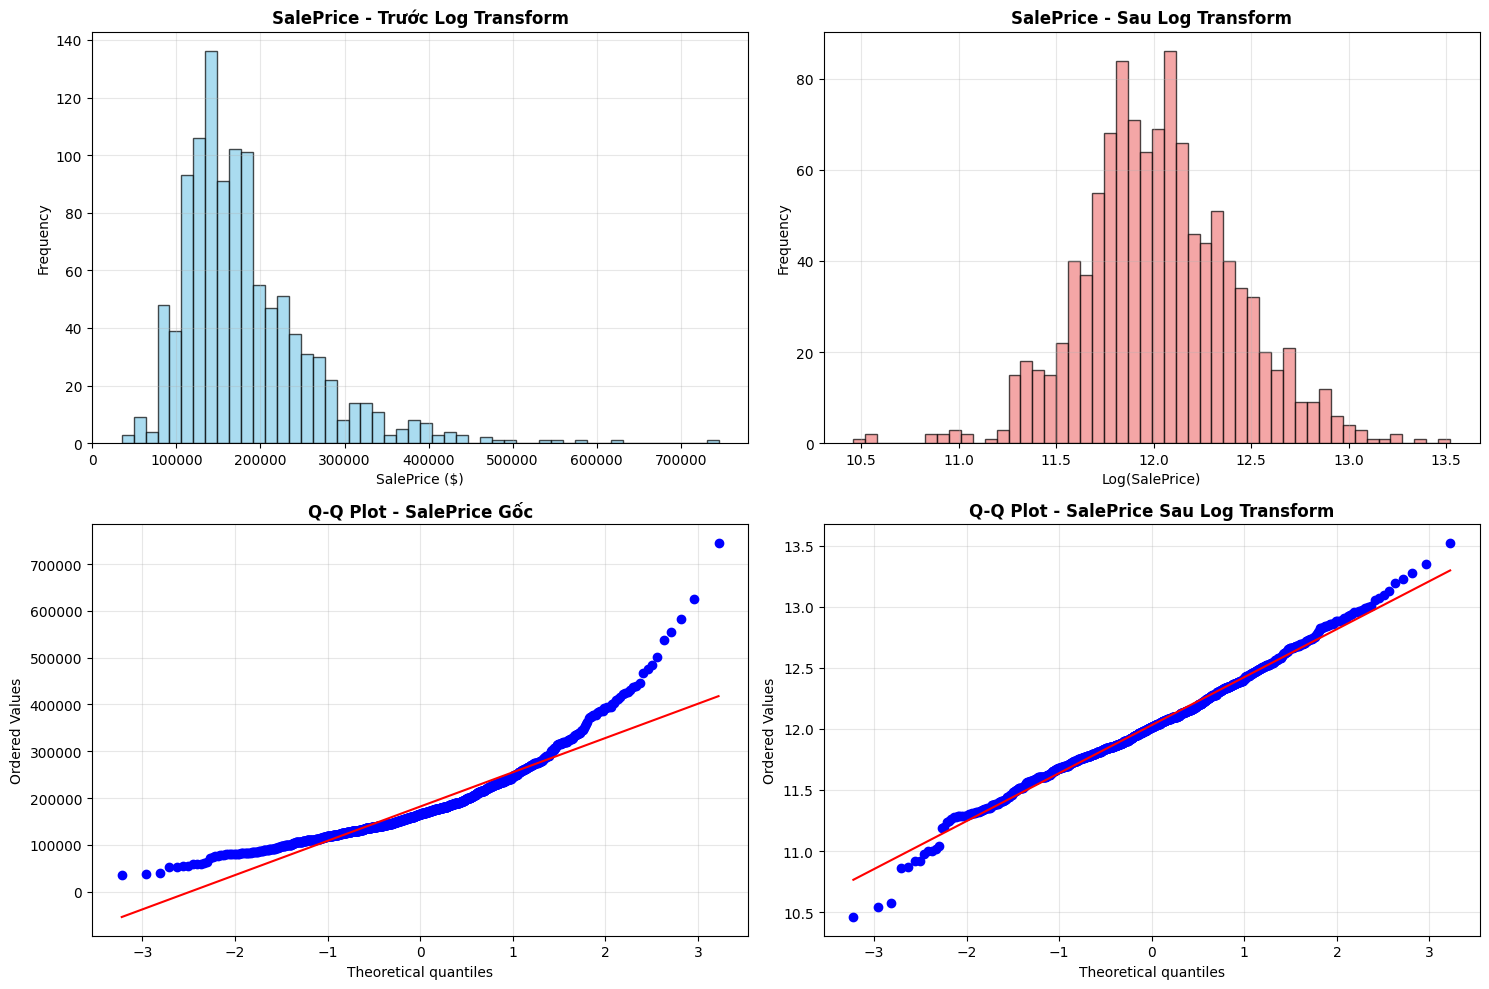


=== SKEWNESS COMPARISON ===
SalePrice trước log transform: 1.754
SalePrice sau log transform: 0.116
Cải thiện skewness: 1.638


In [129]:
print("=== VISUALIZATION: TRƯỚC VÀ SAU LOG TRANSFORMATION ===")

# 1. Plot SalePrice (target variable) trước và sau log transformation
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# SalePrice gốc
axes[0, 0].hist(y_train, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('SalePrice - Trước Log Transform', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('SalePrice ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True, alpha=0.3)

# SalePrice sau log transform
axes[0, 1].hist(y_train_log, bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('SalePrice - Sau Log Transform', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Log(SalePrice)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(True, alpha=0.3)

# Q-Q plot cho SalePrice gốc
from scipy import stats
stats.probplot(y_train, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot - SalePrice Gốc', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Q-Q plot cho SalePrice sau log transform
stats.probplot(y_train_log, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot - SalePrice Sau Log Transform', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Tính skewness để so sánh
from scipy.stats import skew
skew_before = skew(y_train)
skew_after = skew(y_train_log)

print(f"\n=== SKEWNESS COMPARISON ===")
print(f"SalePrice trước log transform: {skew_before:.3f}")
print(f"SalePrice sau log transform: {skew_after:.3f}")
print(f"Cải thiện skewness: {abs(skew_before) - abs(skew_after):.3f}")



=== FEATURES QUAN TRỌNG: TRƯỚC VÀ SAU LOG TRANSFORM ===


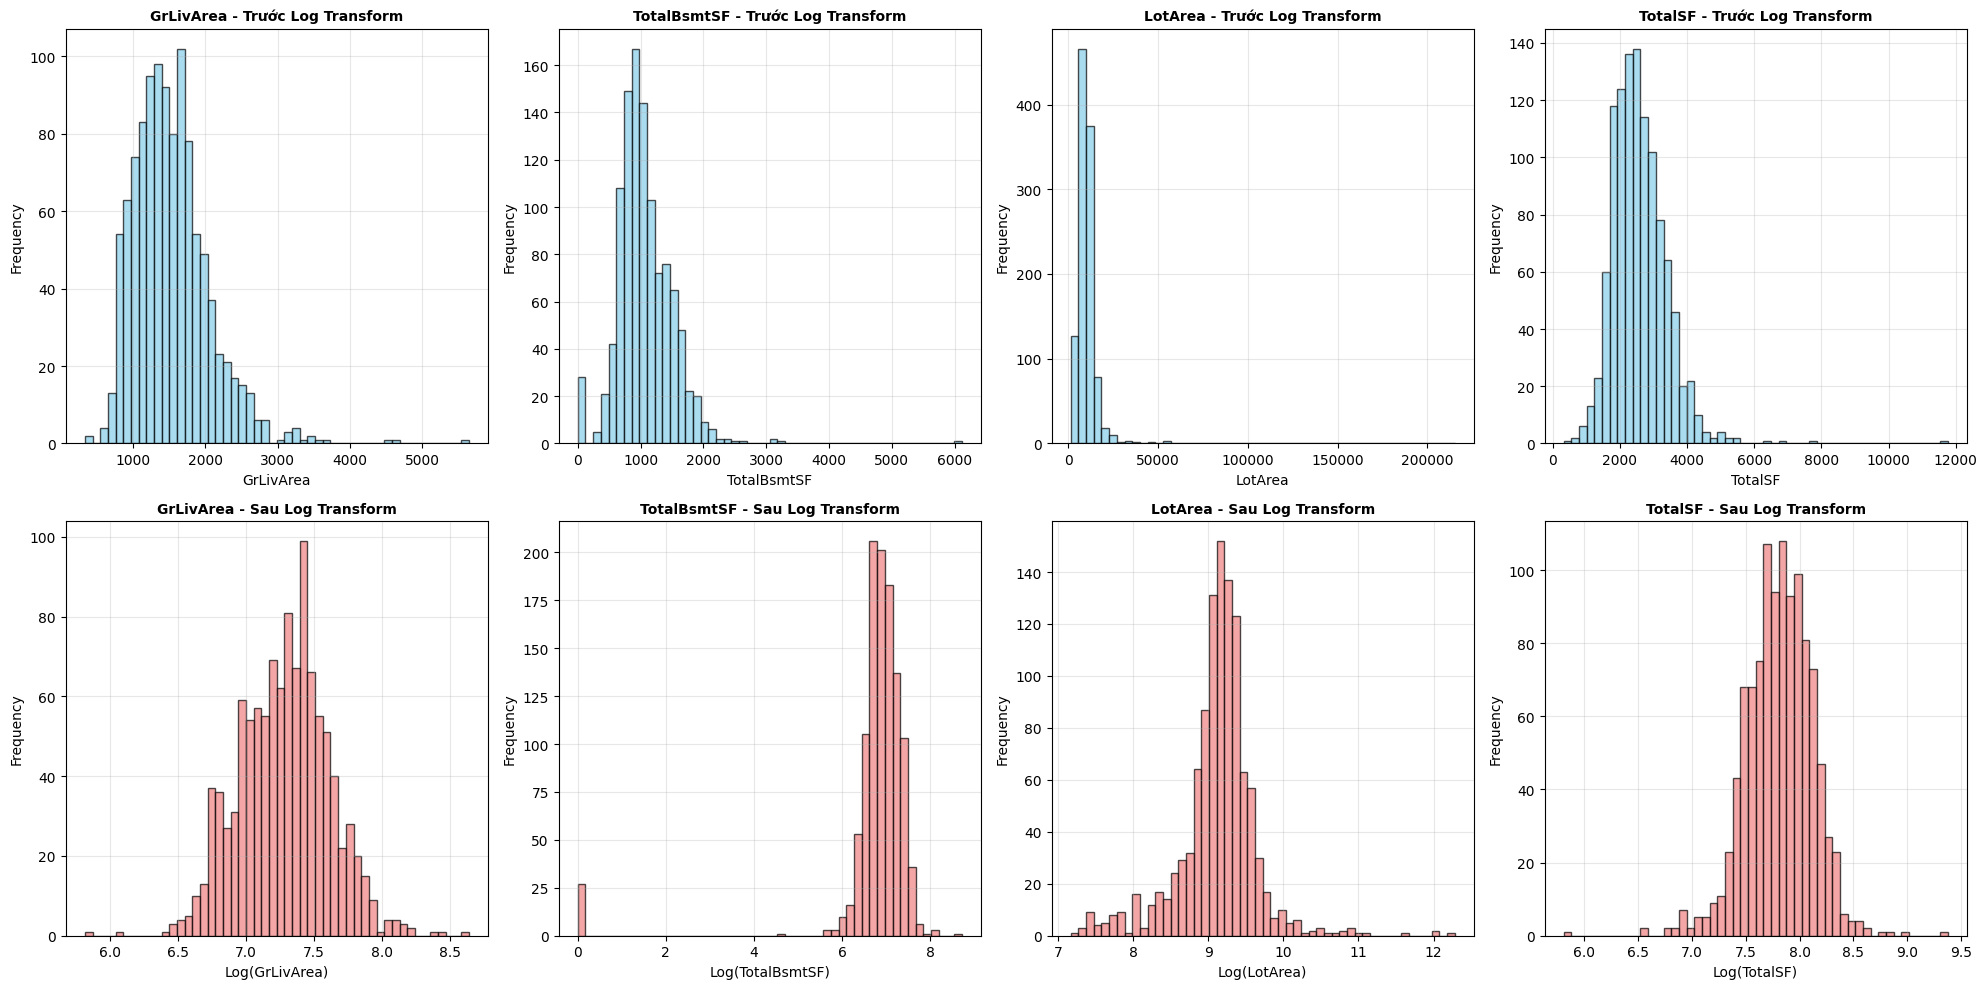


=== SKEWNESS COMPARISON CHO 4 FEATURES QUAN TRỌNG ===
GrLivArea      :  1.453 →  0.002 (cải thiện:  1.451)
TotalBsmtSF    :  1.773 → -5.200 (cải thiện: -3.427)
LotArea        : 11.691 → -0.010 (cải thiện: 11.680)
TotalSF        :  2.038 → -0.392 (cải thiện:  1.646)


In [130]:
# 2. Plot các features quan trọng trước và sau log transformation
print("\n=== FEATURES QUAN TRỌNG: TRƯỚC VÀ SAU LOG TRANSFORM ===")

# Chọn 6 features quan trọng nhất để visualize
important_features = ['GrLivArea', 'TotalBsmtSF', 'LotArea', 'GarageArea', 'TotalSF', 'LotFrontage']

# Lọc các features có trong dataset và đã được log transform
available_features = [f for f in important_features if f in log_cols]

if len(available_features) >= 4:
    # Chọn 4 features đầu tiên để plot
    features_to_plot = available_features[:4]
    
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    
    for i, feature in enumerate(features_to_plot):
        # Trước log transform
        axes[0, i].hist(X_train[feature], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
        axes[0, i].set_title(f'{feature} - Trước Log Transform', fontsize=10, fontweight='bold')
        axes[0, i].set_xlabel(feature)
        axes[0, i].set_ylabel('Frequency')
        axes[0, i].grid(True, alpha=0.3)
        
        # Sau log transform
        axes[1, i].hist(X_train_transformed[feature], bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
        axes[1, i].set_title(f'{feature} - Sau Log Transform', fontsize=10, fontweight='bold')
        axes[1, i].set_xlabel(f'Log({feature})')
        axes[1, i].set_ylabel('Frequency')
        axes[1, i].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Tính skewness cho các features này
    print(f"\n=== SKEWNESS COMPARISON CHO {len(features_to_plot)} FEATURES QUAN TRỌNG ===")
    for feature in features_to_plot:
        skew_before = skew(X_train[feature].dropna())
        skew_after = skew(X_train_transformed[feature].dropna())
        improvement = abs(skew_before) - abs(skew_after)
        print(f"{feature:15s}: {skew_before:6.3f} → {skew_after:6.3f} (cải thiện: {improvement:6.3f})")
else:
    print("Không đủ features quan trọng để visualize")



=== BOX PLOTS: SO SÁNH OUTLIERS TRƯỚC VÀ SAU LOG TRANSFORM ===


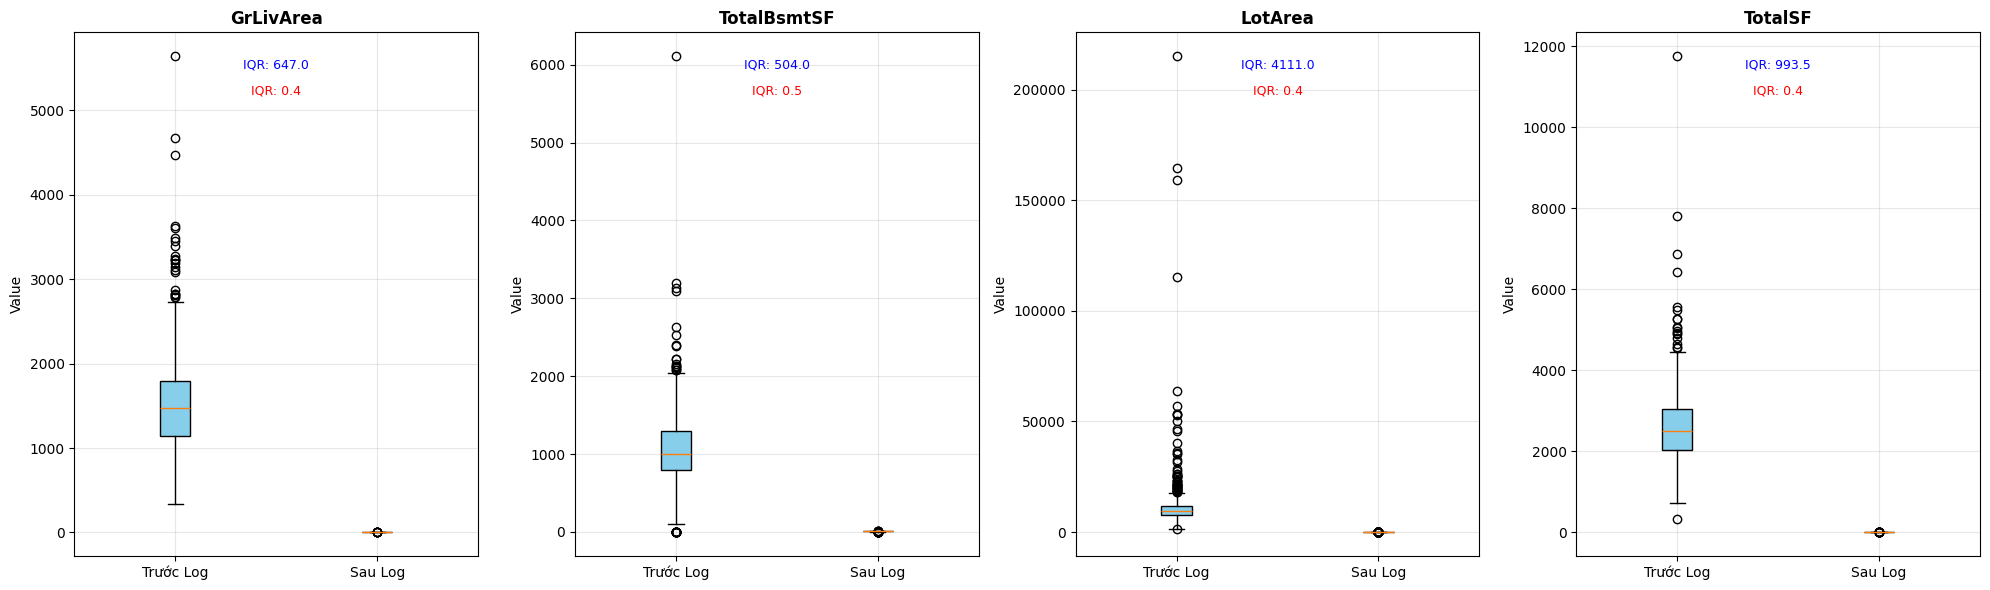


Lưu ý: Box plots cho thấy sự thay đổi về outliers và spread của dữ liệu


In [131]:
# 3. Box plots để so sánh outliers trước và sau log transformation
print("\n=== BOX PLOTS: SO SÁNH OUTLIERS TRƯỚC VÀ SAU LOG TRANSFORM ===")

if len(available_features) >= 4:
    features_to_plot = available_features[:4]
    
    fig, axes = plt.subplots(1, 4, figsize=(20, 6))
    
    for i, feature in enumerate(features_to_plot):
        # Tạo subplot với 2 box plots
        ax = axes[i]
        
        # Dữ liệu trước và sau log transform
        data_before = X_train[feature].dropna()
        data_after = X_train_transformed[feature].dropna()
        
        # Tạo box plot
        box_data = [data_before, data_after]
        box_labels = ['Trước Log', 'Sau Log']
        
        bp = ax.boxplot(box_data, labels=box_labels, patch_artist=True)
        
        # Màu sắc
        bp['boxes'][0].set_facecolor('skyblue')
        bp['boxes'][1].set_facecolor('lightcoral')
        
        ax.set_title(f'{feature}', fontsize=12, fontweight='bold')
        ax.set_ylabel('Value')
        ax.grid(True, alpha=0.3)
        
        # Thêm thống kê
        q1_before, q3_before = data_before.quantile([0.25, 0.75])
        q1_after, q3_after = data_after.quantile([0.25, 0.75])
        iqr_before = q3_before - q1_before
        iqr_after = q3_after - q1_after
        
        ax.text(0.5, 0.95, f'IQR: {iqr_before:.1f}', transform=ax.transAxes, 
                ha='center', va='top', fontsize=9, color='blue')
        ax.text(0.5, 0.90, f'IQR: {iqr_after:.1f}', transform=ax.transAxes, 
                ha='center', va='top', fontsize=9, color='red')
    
    plt.tight_layout()
    plt.show()
    
    print("\nLưu ý: Box plots cho thấy sự thay đổi về outliers và spread của dữ liệu")
else:
    print("Không đủ features để tạo box plots")



=== TỔNG KẾT THỐNG KÊ LOG TRANSFORMATION ===
Tổng số features được log transform: 32

Top 10 features có cải thiện skewness tốt nhất:
     Feature  Skew_Before  Skew_After  Improvement
     MiscVal    17.116358    4.842934    12.273424
     LotArea    11.690665   -0.010349    11.680317
   3SsnPorch     9.721204    7.449907     2.271297
 OpenPorchSF     2.234466   -0.063573     2.170893
  MasVnrArea     2.246587    0.449129     1.797458
  BsmtFinSF2     4.259213    2.570829     1.688384
LowQualFinSF     9.069413    7.384474     1.684939
     TotalSF     2.038258   -0.392322     1.645937
   GrLivArea     1.452852    0.002129     1.450723
    1stFlrSF     1.460996    0.015960     1.445037

=== THỐNG KÊ TỔNG QUAN ===
Số features được cải thiện: 25/32 (78.1%)
Cải thiện skewness trung bình: 1.183
Tổng cải thiện skewness: 37.864


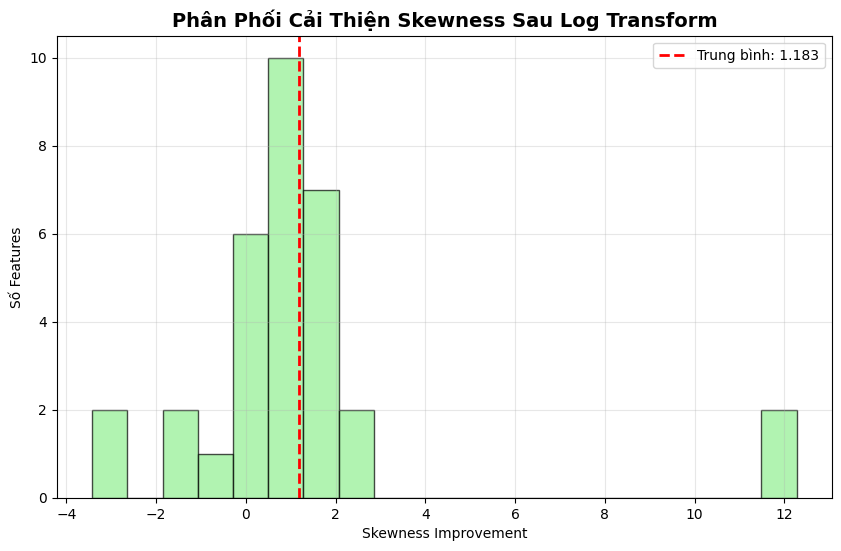


✓ Log transformation đã hoàn thành và có hiệu quả!


In [132]:
# 4. Tổng kết thống kê về log transformation
print("\n=== TỔNG KẾT THỐNG KÊ LOG TRANSFORMATION ===")

# Tính skewness cho tất cả các cột đã được log transform
skewness_comparison = []

for feature in log_cols:
    if feature in X_train.columns and feature in X_train_transformed.columns:
        skew_before = skew(X_train[feature].dropna())
        skew_after = skew(X_train_transformed[feature].dropna())
        improvement = abs(skew_before) - abs(skew_after)
        
        skewness_comparison.append({
            'Feature': feature,
            'Skew_Before': skew_before,
            'Skew_After': skew_after,
            'Improvement': improvement
        })

# Sắp xếp theo mức độ cải thiện
skewness_df = pd.DataFrame(skewness_comparison)
skewness_df = skewness_df.sort_values('Improvement', ascending=False)

print(f"Tổng số features được log transform: {len(log_cols)}")
print(f"\nTop 10 features có cải thiện skewness tốt nhất:")
print(skewness_df.head(10)[['Feature', 'Skew_Before', 'Skew_After', 'Improvement']].to_string(index=False))

# Thống kê tổng quan
total_improvement = skewness_df['Improvement'].sum()
avg_improvement = skewness_df['Improvement'].mean()
features_improved = len(skewness_df[skewness_df['Improvement'] > 0])

print(f"\n=== THỐNG KÊ TỔNG QUAN ===")
print(f"Số features được cải thiện: {features_improved}/{len(skewness_df)} ({features_improved/len(skewness_df)*100:.1f}%)")
print(f"Cải thiện skewness trung bình: {avg_improvement:.3f}")
print(f"Tổng cải thiện skewness: {total_improvement:.3f}")

# Plot histogram của skewness improvement
plt.figure(figsize=(10, 6))
plt.hist(skewness_df['Improvement'], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
plt.axvline(avg_improvement, color='red', linestyle='--', linewidth=2, label=f'Trung bình: {avg_improvement:.3f}')
plt.xlabel('Skewness Improvement')
plt.ylabel('Số Features')
plt.title('Phân Phối Cải Thiện Skewness Sau Log Transform', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\n✓ Log transformation đã hoàn thành và có hiệu quả!")
